# Economics Problem 2
### Navneeraj Sharma

### Question 2.1

### The state variable are:-

1. The capital stock -$ k_{t} $ 
2. The productivity shocks to income function $ y_{t} $ given by $ z_{t} $
3. Income is completely determined by $ k_{t} $ and  $ z_{t} $. State Variable choice may be dependent on formulation of the problem

### Question 2.2

### The control variable are:-

1. The consumption  -  $ c_{t} $  and investment $ i_{t} $

### Question 2.3

### The Bellman equation is given by 

$$ V(k_{t},z_{t}) = \max_{c_t}  [u(c_{t})] + \beta E[V(k_{t+1},z_{t+1})]  $$

where

$$ c_{t} = (1-\delta)k_{t} + z_{t}k_{t}^\alpha - k_{t+1} $$

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import fminbound
import scipy.optimize as opt
import numba

# to print plots inline
%matplotlib inline

In [2]:
beta = 0.96
gamma = 0.50
delta =  0.05
alpha = 0.4
mean_shock = 0.0
sigma_shock = 0.20

'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital(k) grid
ub_k      = scalar, upper bound of capital(k) grid 
size_k    = integer, number of grid points in kapital state space
k_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------
'''
lb_k = .1
ub_k = 20.0 
size_k = 500  # Number of grid points for capital grid
size_eps = 100 # Number of grid points for shock grid
k_grid = np.linspace(lb_k, ub_k, size_k)
shock_grid =  np.exp(mean_shock + sigma_shock* np.random.randn(size_eps))

In [3]:
def utility(C,gamma):
    U = (C ** (1 - gamma)) / (1 - gamma)
    return U  

In [4]:
''' Create a three dimesional utility array with dimensions for k,k' and z.
Once the utility has been calculated at each of the value in this array. 
Take a mean value in the z dimension to get a 2-D array for Expected utility
'''
C =  np.zeros((size_k, size_k, size_eps))

@numba.jit
def C_loop(size_k,size_eps,delta,k_grid,shock_grid,alpha):
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k'
            for s in range(size_eps): #loop over z shock
                C[i,j,s] =   (1-delta)*k_grid[i] + shock_grid[s]*k_grid[i]**alpha-k_grid[j]

    return C

C =  C_loop(size_k,size_eps,delta,k_grid,shock_grid,alpha)
C[C<0] = 1e-6
U = utility(C,gamma) 
U[C == 1e-6] = -1e6

EU = np.mean(U, axis =2)

## Step 2: Value Function Iteration

In [5]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
VFtol     = scalar, tolerance required for value function to converge
VFdist    = scalar, distance between last two value functions
VFmaxiter = integer, maximum number of iterations for value function
V         = vector, the value functions at each iteration
Vmat      = matrix, the value for each possible combination of k and k'
Vstore    = matrix, stores V at each iteration 
VFiter    = integer, current iteration number
TV        = vector, the value function after applying the Bellman operator
PF        = vector, indicies of choices of k' for all k 
VF        = vector, the "true" value function
------------------------------------------------------------------------
'''
VFtol = 1e-8
VFdist = 7.0 
VFmaxiter = 5000 
V = np.zeros(size_k) # initial guess at value function
Vmat = np.zeros((size_k, size_k)) # initialize Vmat matrix
Vstore = np.zeros((size_k, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    @numba.jit
    def VFI_loop(size_k,Vmat,EU,beta,V):
        for i in range(size_k): # loop over k
            for j in range(size_k): # loop over k'
                Vmat[i, j] = EU[i, j] + beta * V[j] 
        return Vmat

    Vmat =  VFI_loop(size_k,Vmat,EU,beta,V)
    Vstore[:, VFiter] = V.reshape(size_k,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator to Vmat (to get V(w))
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    print("Iteration ", VFiter, "dist =", VFdist)
    V = TV
    VFiter += 1 
    
if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Iteration  1 dist = 9.447850905569618
Iteration  2 dist = 4.247129930024096
Iteration  3 dist = 3.417992440800546
Iteration  4 dist = 2.987269754394678
Iteration  5 dist = 2.704870407298767
Iteration  6 dist = 2.4958525920631303
Iteration  7 dist = 2.3291417944840447
Iteration  8 dist = 2.1895010585685633
Iteration  9 dist = 2.068398560525175
Iteration  10 dist = 1.960803126483185
Iteration  11 dist = 1.8635500853691624
Iteration  12 dist = 1.7745556271221403
Iteration  13 dist = 1.6922016341493133
Iteration  14 dist = 1.6155037806330341
Iteration  15 dist = 1.5436427059997797
Iteration  16 dist = 1.4760447025110253
Iteration  17 dist = 1.4122700714568026
Iteration  18 dist = 1.3518372592420107
Iteration  19 dist = 1.2945434395165236
Iteration  20 dist = 1.2401054850768674
Iteration  21 dist = 1.1882127660846677
Iteration  22 dist = 1.1388616243517902
Iteration  23 dist = 1.09169292188421
Iteration  24 dist = 1.046763309791416
Iteration  25 dist = 1.0037602994287056
Iteration  26 dist 

Iteration  198 dist = 0.000852643687991872
Iteration  199 dist = 0.0008185379404750392
Iteration  200 dist = 0.0007857964228605852
Iteration  201 dist = 0.0007543645659495724
Iteration  202 dist = 0.0007241899833161369
Iteration  203 dist = 0.0006952223839817862
Iteration  204 dist = 0.0006674134886139882
Iteration  205 dist = 0.0006407169490785236
Iteration  206 dist = 0.0006150882711182248
Iteration  207 dist = 0.0005904847402717905
Iteration  208 dist = 0.0005668653506631927
Iteration  209 dist = 0.0005441907366332543
Iteration  210 dist = 0.0005224231071707663
Iteration  211 dist = 0.0005015261828873463
Iteration  212 dist = 0.0004814651355644628
Iteration  213 dist = 0.00046220653014472646
Iteration  214 dist = 0.00044371826894007427
Iteration  215 dist = 0.00042596953818474503
Iteration  216 dist = 0.0004089307566630396
Iteration  217 dist = 0.00039257352639765486
Iteration  218 dist = 0.00037687058534174867
Iteration  219 dist = 0.00036179576191841534
Iteration  220 dist = 0.000

Iteration  384 dist = 4.2975108272003126e-07
Iteration  385 dist = 4.125610360006249e-07
Iteration  386 dist = 3.9605859569746826e-07
Iteration  387 dist = 3.802162495958328e-07
Iteration  388 dist = 3.650076081385123e-07
Iteration  389 dist = 3.5040729073898547e-07
Iteration  390 dist = 3.36391011046544e-07
Iteration  391 dist = 3.22935363783472e-07
Iteration  392 dist = 3.1001795264273824e-07
Iteration  393 dist = 2.976172339685945e-07
Iteration  394 dist = 2.8571254517828493e-07
Iteration  395 dist = 2.742840337077723e-07
Iteration  396 dist = 2.6331268543344777e-07
Iteration  397 dist = 2.5278016835272865e-07
Iteration  398 dist = 2.4266896048175113e-07
Iteration  399 dist = 2.3296220774682297e-07
Iteration  400 dist = 2.2364372398442356e-07
Iteration  401 dist = 2.1469797673034918e-07
Iteration  402 dist = 2.061100587980036e-07
Iteration  403 dist = 1.9786565985668858e-07
Iteration  404 dist = 1.8995103800989455e-07
Iteration  405 dist = 1.8235300558444578e-07
Iteration  406 dist 

## Step 3: Extract decision rules from solution

In [6]:
'''Optimal Choice of c and k'''
optk = k_grid[PF]
optc = (1-delta)*k_grid + np.mean(shock_grid)*k_grid**alpha-optk

## Visualize output

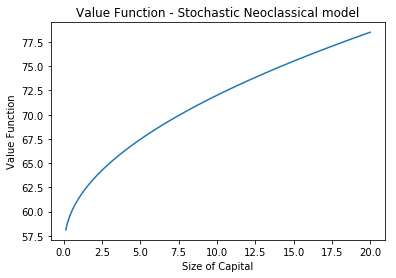

In [7]:
# Plot value function 
plt.figure()
plt.plot(k_grid[1:], VF[1:])
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function - Stochastic Neoclassical model')
plt.show()

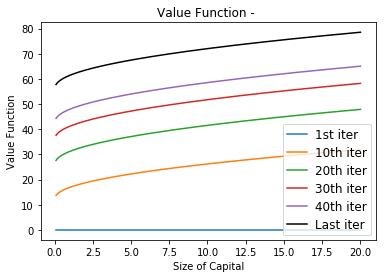

In [8]:
# Plot value function at several iterations
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid, Vstore[:,0], label='1st iter')
ax.plot(k_grid, Vstore[:,10], label='10th iter')
ax.plot(k_grid, Vstore[:,20], label='20th iter')
ax.plot(k_grid, Vstore[:,30], label='30th iter')
ax.plot(k_grid, Vstore[:,40], label='40th iter')
ax.plot(k_grid, Vstore[:,VFiter-1], 'k', label='Last iter')
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function - ')
plt.show()

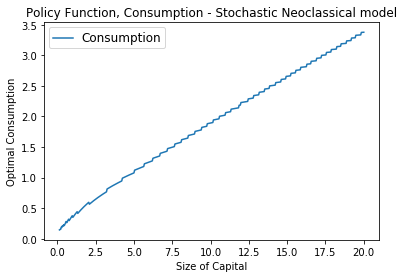

In [9]:
#Plot optimal consumption rule as a function of captal
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], optc[1:], label='Consumption')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, Consumption - Stochastic Neoclassical model')
plt.show()

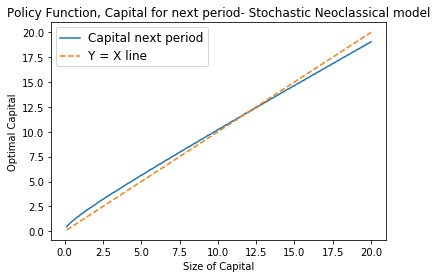

In [10]:
#Plot optimal capital next period rule as a function of cake size
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], optk[1:], label='Capital next period')
ax.plot(k_grid[1:], k_grid[1:], '--', label='Y = X line')
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Capital')
plt.title('Policy Function, Capital for next period- Stochastic Neoclassical model')
plt.show()